# Model3

นำข้อมูลดิบจาก air4thai.csv มา Train model

# Install pycaret

In [1]:
%pip install "pycaret[full]"

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pycaret.utils import version
version()

'3.3.0'

# Get Data

In [3]:
from pycaret.datasets import get_data
data = get_data('air4thai')


,Unnamed: 0,DATETIMEDATA,PM25
0,0,2024-01-01 00:00:00,16.5
1,1,2024-01-01 01:00:00,33.6
2,2,2024-01-01 02:00:00,34.2
3,3,2024-01-01 03:00:00,20.1
4,4,2024-01-01 04:00:00,16.5


# Clean data

ลบ column Unnamed: 0 ออก

In [4]:
del data['Unnamed: 0']
data

,DATETIMEDATA,PM25
0,2024-01-01 00:00:00,16.5
1,2024-01-01 01:00:00,33.6
2,2024-01-01 02:00:00,34.2
3,2024-01-01 03:00:00,20.1
4,2024-01-01 04:00:00,16.5
...,...,...
475,2024-01-20 19:00:00,23.8
476,2024-01-20 20:00:00,28.3
477,2024-01-20 21:00:00,33.9
478,2024-01-20 22:00:00,25.8


<Axes: >

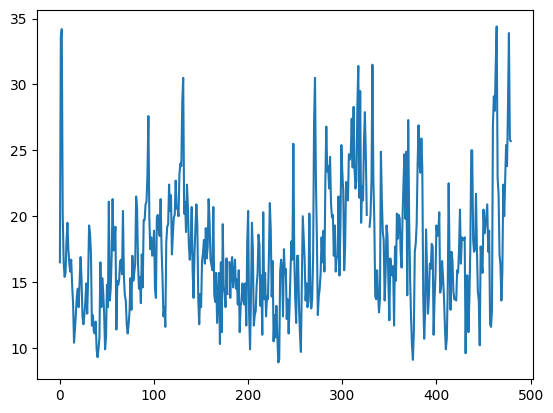

In [5]:
data['PM25'].plot()

In [6]:
data.dtypes

DATETIMEDATA     object
PM25            float64
dtype: object

fill ค่าเฉลี่ยแทนที่ค่า NaN

In [7]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  480 non-null    object 
 1   PM25          480 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


กำหนด data['DATETIMEDATA'] ให้เป็นชนิดข้อมูลแบบ datetime64 โดยใช้ to_datetime()

In [8]:
import pandas as pd
data['DATETIMEDATA'] = pd.to_datetime(data['DATETIMEDATA'])
data.dtypes

DATETIMEDATA    datetime64[ns]
PM25                   float64
dtype: object

set_index ของ column 'DATETIMEDATA'

In [9]:
data.set_index('DATETIMEDATA', drop=True, inplace=True)

<Axes: xlabel='DATETIMEDATA'>

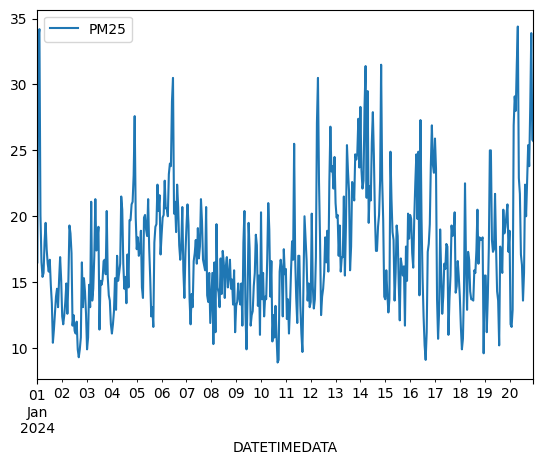

In [10]:
data.plot()

# Setup

In [11]:
from pycaret.time_series import *
s = setup(data, fold=3, fh=12, session_id=123, target='PM25')

,Description,Value
0,session_id,123
1,Target,PM25
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(480, 1)"
5,Transformed data shape,"(480, 1)"
6,Transformed train set shape,"(468, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [12]:
plot_model()

In [13]:
# all_columns = data[data.columns[0]].count()
# all_columns

In [14]:
# test = data.sample(int(0.3*all_columns), random_state=20)
# train = data.drop(test.index)

In [15]:
plot_model(plot='train_test_split')

In [16]:
plot_model(plot='cv')

In [17]:
plot_model(plot='pacf')

In [18]:
plot_model(plot='diagnostics')

# compare models

In [19]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.8373,0.8322,3.3614,4.3951,0.1827,0.1830,0.0241,0.1033
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8720,0.8870,3.4952,4.6772,0.1608,0.1761,0.1313,0.1867
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8872,0.8348,3.5553,4.4014,0.1739,0.1820,0.2448,0.2233
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8927,0.8474,3.5778,4.4684,0.1718,0.1825,0.2175,0.0933
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8934,0.8305,3.5805,4.3787,0.1782,0.1838,0.2532,0.0933
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8934,0.8305,3.5805,4.3787,0.1782,0.1838,0.2532,0.1533
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.8977,0.8440,3.5982,4.4503,0.1760,0.1848,0.2199,0.0967
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8993,0.8533,3.6046,4.4995,0.1724,0.1840,0.2049,0.1367
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8994,0.8533,3.6046,4.4996,0.1724,0.1840,0.2049,0.1833
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8996,0.8909,3.6057,4.6970,0.1628,0.1809,0.1432,0.2567


# Predict Model

In [20]:
predict_model(best, fh = 168)

,y_pred
2024-01-20 12:00,14.8770
2024-01-20 13:00,11.0693
2024-01-20 14:00,14.1991
2024-01-20 15:00,13.9644
2024-01-20 16:00,18.5634
...,...
2024-01-27 07:00,30.3032
2024-01-27 08:00,21.3333
2024-01-27 09:00,23.8398
2024-01-27 10:00,21.2668


In [21]:
plot_model(best, plot = 'forecast', data_kwargs={'fh' : 100})

# Finalize Model

In [22]:
final_model = finalize_model(best)

In [23]:
pred_final = predict_model(final_model, fh = 168)
pred_final

,y_pred
2024-01-21 00:00,17.5070
2024-01-21 01:00,17.2930
2024-01-21 02:00,19.3376
2024-01-21 03:00,21.3639
2024-01-21 04:00,23.0232
...,...
2024-01-27 19:00,32.3879
2024-01-27 20:00,32.2009
2024-01-27 21:00,30.5429
2024-01-27 22:00,32.1077


In [24]:
import matplotlib.pyplot as plt

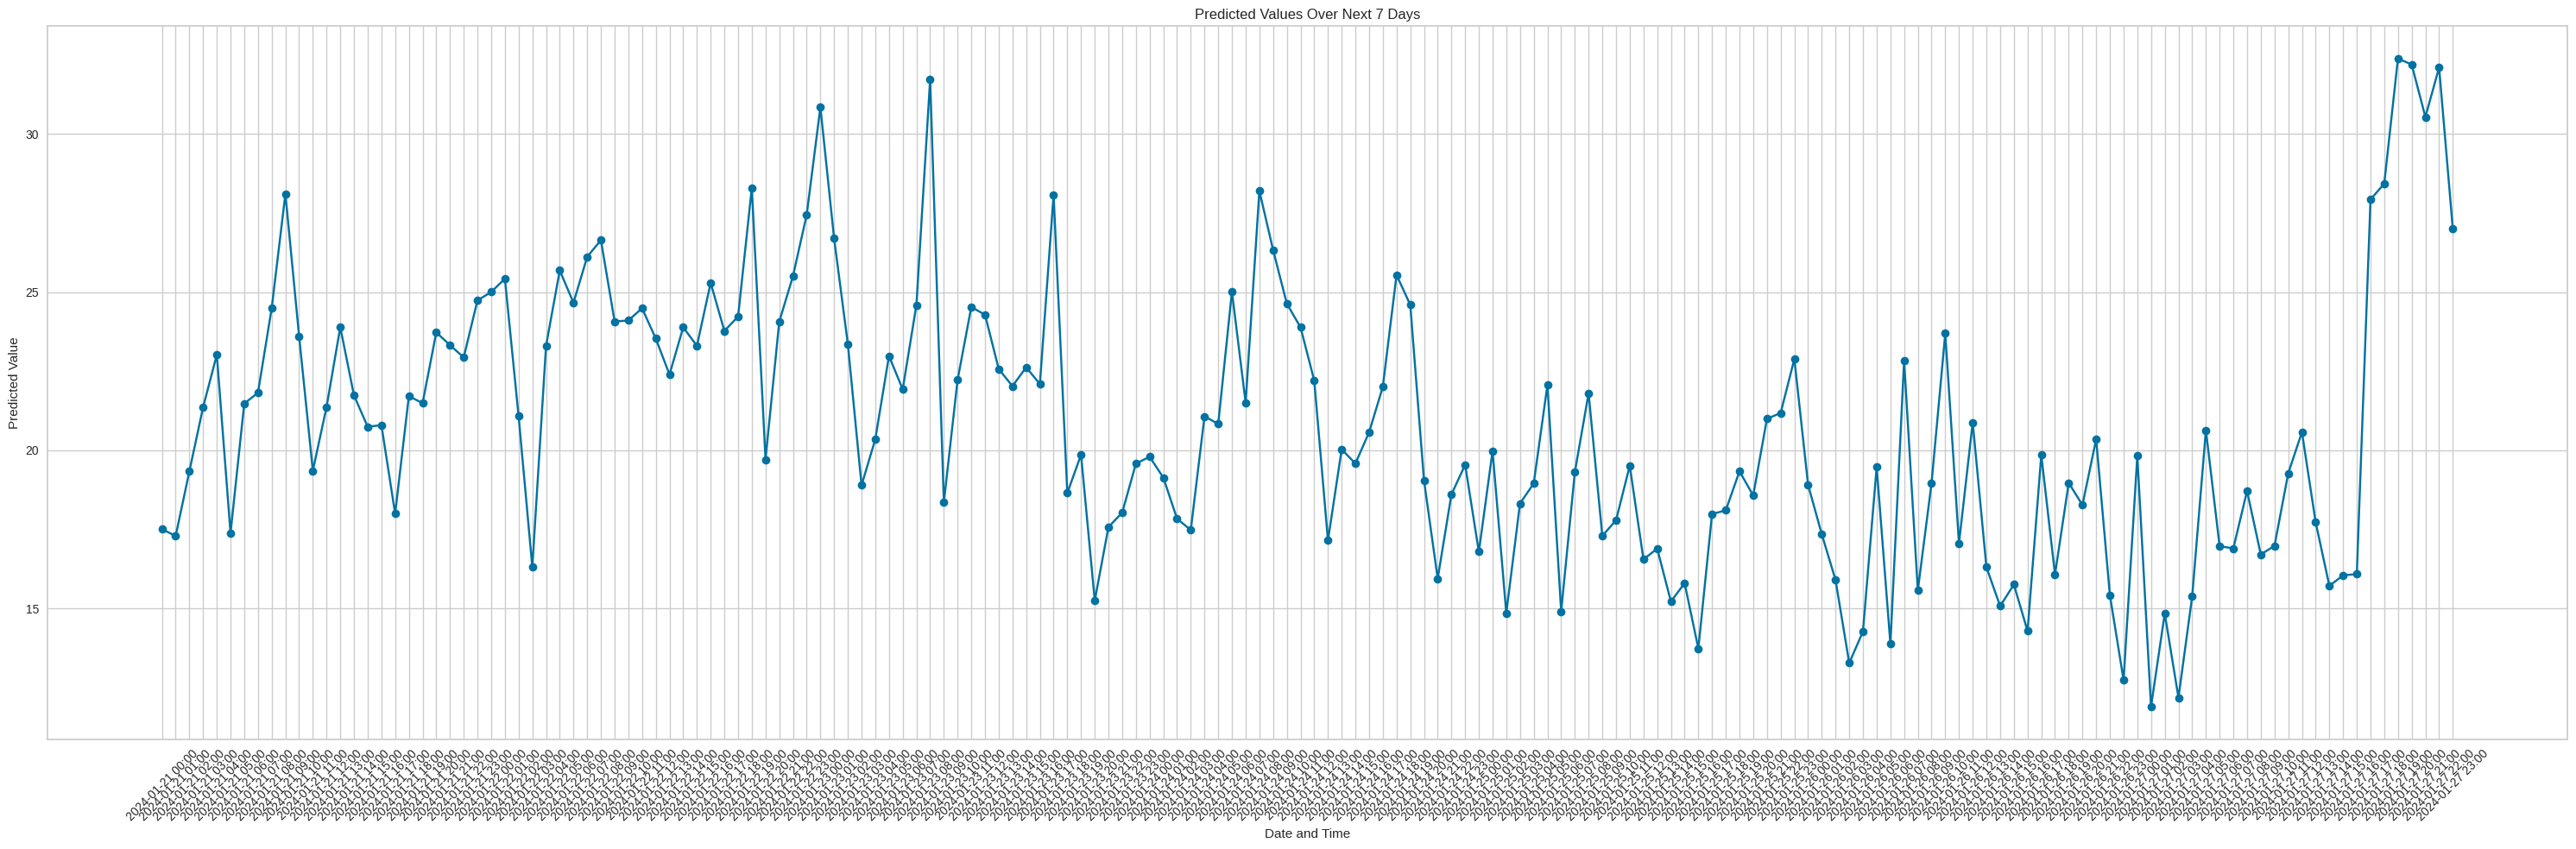

In [32]:
import matplotlib.pyplot as plt

# Convert index to string format
pred_final.index = pred_final.index.astype(str)

# Plot the graph
plt.figure(figsize=(30, 10))
plt.plot(pred_final.index, pred_final.values, marker='o', linestyle='-')
plt.title('Predicted Values Over Next 7 Days')
plt.xlabel('Date and Time')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
plot_model(final_model, plot = 'forecast', data_kwargs={'fh' : 168})